In [3]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Code `get_data()`

## Create _draft code_ in the notebook

In [4]:
# Where am I?
os.getcwd()

'/Users/bingobango/code/lewagon/data-olist_data_metric'

In [5]:
import os
import pandas as pd

# Build relative path to csv folder 
csv_path = '/home/vincent/code/vtmoreau/04-Decision-Sicence/01-Project-Setup/data-context-and-setup/data/csv' # Bad practice!
csv_path = '../data-context-and-setup/data/csv' # Mac OS / Ubuntu only
csv_path = '..\\data-context-and-setup\\data\\csv' # Windows only
csv_path = os.path.join('..', 'data-context-and-setup','data','csv') # Robust to Linux/OS/Windows variations

csv_path

'../data-context-and-setup/data/csv'

In [7]:
lst = []
for file in os.listdir(csv_path):
    if file.endswith('.csv'):
        lst.append(file)

In [9]:
lst

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [6]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [10]:
#.strip() or .replace()
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [ ]:
# How to iterate over two list simulatenously ? 
# Let's discover how zip works :

l1 = ['a','b','c']
l2 = [1,2,3]
list(zip(l1,l2))

In [11]:
# Create the dictionary

data = {}

for (k, f) in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))

data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
data['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


## Transfer logic to `olist/data.py` 🐍

When you call a function that you will name `get_data` from `olist/data.py`, it should return the dictionary `data`:with key/value pairs `"name of the dataset":"dataset.csv"`

```python
from olist.data import Olist
Olist().get_data()
```
- Take your time to understand what happens when calling `Olist().get_data()`
- Your method `get_data()` needs to be callable from various places (e.g your Terminal, this notebook, another notebook located elsewhere, etc...)
- You can't use a relative path this time as the current working directory `os.getcwd()` depends on where you run the code in the first place


In [14]:
# Test your code
from olist.data import Olist
Olist().get_data().keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

# Let's build a business metric: `Weekly Sales` 📈

<img src="https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/01-Project-Setup/olist_schema.png" width=1000>

**Goal**: Plot the weekly sum of `payment_value` for delivered orders

1️⃣ **Step 1**: Pseudo code your process in English below before actually coding

In [16]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

1. get the order_payments table
2. group by order_id get the sum()
3. merge onto orders table on order_id --> [payment_value, order_id, order_purchase_timeastamp]
4. filter by deliver orders 
5. plot

2️⃣ **Step 2**: Code your logic

In [22]:
payment_value = data['order_payments'].groupby('order_id').sum()\
.merge(data['orders'], on='order_id', how='inner')\
.query("order_status=='delivered'")[['payment_value', 'order_id', 'order_purchase_timestamp']]
payment_value

,payment_value,order_id,order_purchase_timestamp
0,72.19,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02
1,259.83,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06
2,216.87,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31
3,25.78,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35
4,218.04,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51
...,...,...,...
99435,343.40,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06
99436,386.53,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46
99437,116.85,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56
99438,64.71,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59


⌛️ Do not forget to handle `datetime` properly.

In [23]:
payment_value.dtypes

payment_value               float64
order_id                     object
order_purchase_timestamp     object
dtype: object

In [24]:
payment_value['order_purchase_timestamp'] = pd.to_datetime(payment_value['order_purchase_timestamp'])

In [25]:
payment_value.dtypes

payment_value                      float64
order_id                            object
order_purchase_timestamp    datetime64[ns]
dtype: object

👉 Set the `order_purchase_timestamp` as the index

In [ ]:
payment_value = payment_value.set_index('order_purchase_timestamp')

In [26]:
payment_value.set_index('order_purchase_timestamp', inplace=True)

In [27]:
payment_value

,payment_value,order_id
order_purchase_timestamp,,
2017-09-13 08:59:02,72.19,00010242fe8c5a6d1ba2dd792cb16214
2017-04-26 10:53:06,259.83,00018f77f2f0320c557190d7a144bdd3
2018-01-14 14:33:31,216.87,000229ec398224ef6ca0657da4fc703e
2018-08-08 10:00:35,25.78,00024acbcdf0a6daa1e931b038114c75
2017-02-04 13:57:51,218.04,00042b26cf59d7ce69dfabb4e55b4fd9
...,...,...
2018-04-23 13:57:06,343.40,fffc94f6ce00a00581880bf54a75a037
2018-07-14 10:26:46,386.53,fffcd46ef2263f404302a634eb57f7eb
2017-10-23 17:07:56,116.85,fffce4705a9662cd70adb13d4a31832d


👉 You can now resample this dataset to compute metrics on a weekly basis.

In [29]:
payment_value.resample("W").sum()

,payment_value
order_purchase_timestamp,
2016-10-09,42669.98
2016-10-16,3896.73
2016-10-23,0.00
2016-10-30,0.00
2016-11-06,0.00
...,...
2018-08-05,320204.74
2018-08-12,318700.65
2018-08-19,285766.68


📈 Plot the weekly payment values to get a big picture of Olist's revenues.

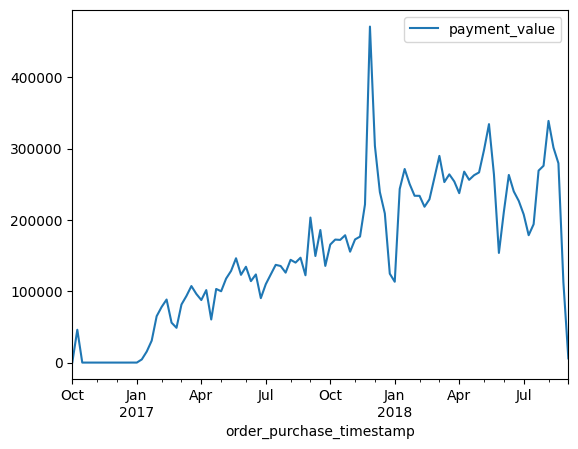

In [34]:
payment_value.resample("W-mon").sum().plot()
plt.show()